# Part II - Prosper loan reports
## by Nguyen Ngau Thu

## Investigation Overview

The investigation focuses on the features of loan profiles that can affect the estimated effective yield. In addition to that, I will also look at the relationships between the features of loan profiles and how certain features affect the relationship between estimated effective yield and other features.

I investigated a few selected variables in the original dataset and analyzed the relationship between these through individual distributions as well as the interactions between them. This report focused on illustrating 
the 3 most insightful findings. These variables include both categorical variables (Loan terms, Loan status,ListingCategory,BorrowerState,Occupation,IsBorrowerHomeowner,IncomeRange) and numerical factors (DebtToIncomeRatio, number of Investors,StatedMonthlyIncome) to help me uncover more insights into lender yield and borrower APR.



## Dataset Overview and Executive Summary

> The dataset is provided by Udacity on Prosper loan, including 113 937 observations, each corresponds to a loan profile, 
and 81 columns, each corresponds to a characteristics of a loan such as loan terms and loan statuses.There are quite many columns, and in this project I only use a subset of columns of interest.

> **Key insights**: 

> 1. Distribution of estimated effective yield

> 2. Relationship between numeric variables

> 3. Effect of employment status on the relationship between original loan amount and estimated effective yield

> 4. Effect of prosper rating on the relationship between original loan amount and estimated effective yield

> 5. Estimated Effective Yield across terms and ratings

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

#Read the data in
loans = pd.read_csv('prosperLoanData.csv')

#Create a subset of the dataset

##Columns of interest

loans.columns
cols = ['Term', 'LoanStatus','LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 
       'ProsperRating (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 
       'IsBorrowerHomeowner',   'ListingCategory (numeric)',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 
       'Investors']

loans_subset = loans[cols]

#make IsBorrowerHomeowner category
loans_subset=loans_subset.astype({'IsBorrowerHomeowner':'category'})



## Distribution of Estimated Effective Yield 

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

The distribution looks unimodal, with the peak around 0.15. After the peak, the distribution is on a downward trend until 0.3. There is no loans with estimated effective yield of more than 30%.

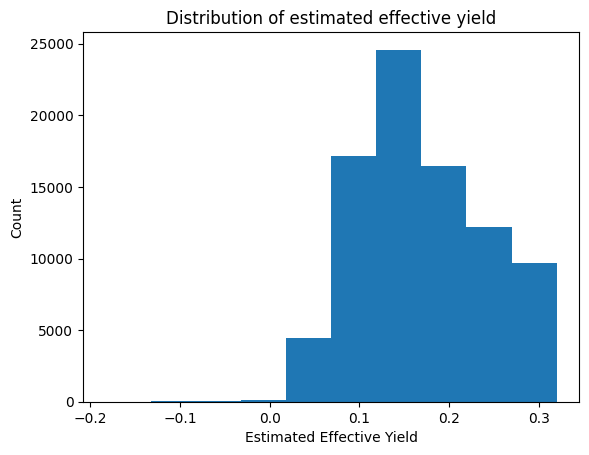

In [3]:
plt.hist(data = loans_subset,x ='EstimatedEffectiveYield')
plt.title('Distribution of estimated effective yield')
plt.xlabel('Estimated Effective Yield')
plt.ylabel('Count')
plt.show()

## Relationship between numeric variables

> We look at the numeric variables in the dataset: Stated monthly income, Borrower APR, Borrower Rate, Original Loan Amount, Estimated Effective Yield, Lender Yield, Debt to income ratio

> Based on the heatmap, outside the very close correlation between Estimated Effective Yield and Borrower APR, between Borrower APR and Borrower Rate, between Estimated Effective Yield and Lender Yield (Coefficient around 0.99), we can see that the correlation coefficient between Estimated Effective Yield and Original Loan Amount (or between Lender Yield and Original Loan Amount) is -0.33. The correlation coefficient between Borrower APR and Original Loan Amount is -0.32. The correlation coefficient between Borrower APR and Original Loan Amount is -0.33. All these correlation coefficient means that the higher the loan amount the lower the gains the investor can receive and the lower the cost the borrower have to pay for the loan. We can also see the correlation coefficient between Stated Monthly Income and Original Loan Amount of 0.2, indicating a reasonable positive relationship: When the monthly stated income increases, the higher original loan amount a borrower can acquire.   

> Finally, it is also interesting to see the seemingly positive relationship between the debt-to-income ratio and the estimated effective yield/ APR. This is also in line with the consistent story of higher risks imply higher return. 


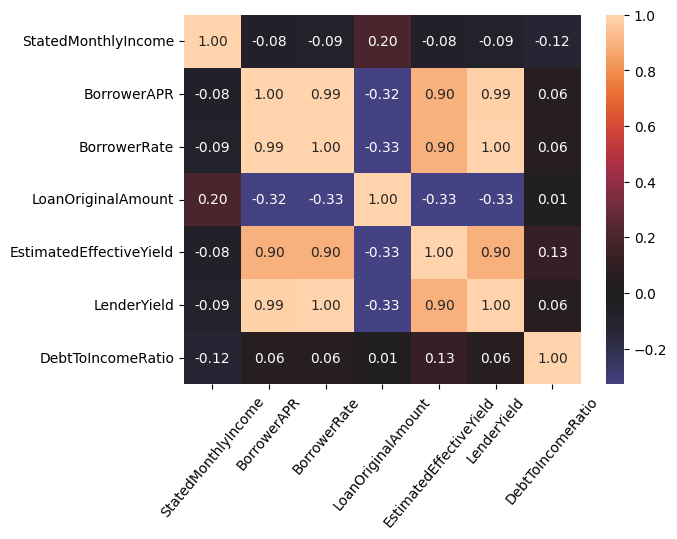

In [4]:
#Numeric variables in the dataset
numeric_var = ['StatedMonthlyIncome','BorrowerAPR','BorrowerRate','LoanOriginalAmount','EstimatedEffectiveYield','LenderYield','DebtToIncomeRatio']
#Heatmap for correlation between all the numerical variables
sns.heatmap(loans_subset[numeric_var].corr(), annot = True, fmt = '0.2f', center = 0)
#rotate xticks
plt.xticks(rotation = 50)
sns.set(font_scale=0.5)
plt.show()

Based on the heatmap below, the average estimated effective yield is highest in the group of unemployed and loan term 36 months. Also, the group of unemployed gets the highest range of average estimated effective yields. The group of unemployed presents the highest risk, resonating with the investment principle: higher risk, higher return. 

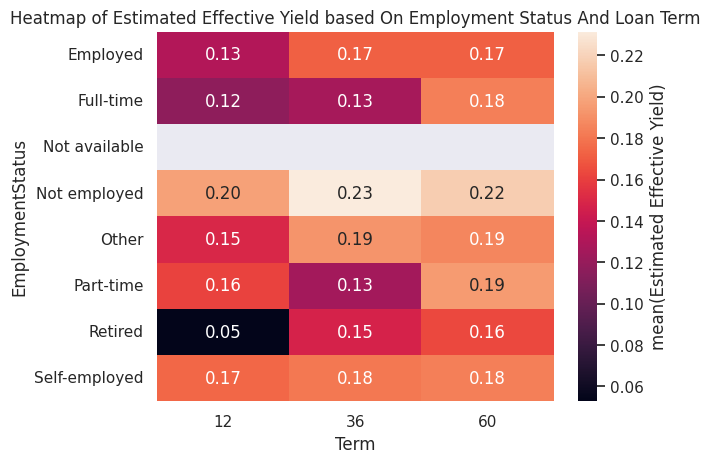

In [5]:


pivottable = loans_subset.groupby(['Term','EmploymentStatus'])['EstimatedEffectiveYield'].mean().reset_index(name = 'Estimated Effective Yield').pivot(columns = 'Term',index = 'EmploymentStatus',values = 'Estimated Effective Yield')
sns.set(font_scale=1)
sns.heatmap(pivottable,annot = True,fmt = '.2f',cbar_kws = {'label': 'mean(Estimated Effective Yield)'})
plt.title('Heatmap of Estimated Effective Yield based On Employment Status And Loan Term');

## Effect of employment status on the relationship between original loan amount and estimated effective yield

> Based on the linear relationship between original loan amount and estimated effective yield segmented by employment status, we can see that employment status does have an impact on the relationship between Original Loan Amount and Estimated Effective Yield. While the correlation coefficient between Original Loan Amount and Estimated Effective Yield is -0.33, indicating a negative relationship, yet depending on each individual employment status the relationship between Original Loan Amount and Estimated Effective Yield can be strong, weak or even non-existent.

In [ ]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=1.5)
g = sns.FacetGrid(data = loans_subset, col ='EmploymentStatus' ,col_wrap = 2)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,15)
plt.figtext(.7,.1,'Employment status does not seem to have a clear impact on the relationship between estimated effective yield and original loan amount')
plt.show()

In [ ]:
#regression plot across categorical variables and numerical variables
#increase font size of all elements
sns.set(font_scale=1.5)
g = sns.FacetGrid(data = loans_subset, col ='ProsperRating (numeric)' ,col_wrap = 4)
g.map(sns.regplot,'LoanOriginalAmount','EstimatedEffectiveYield',x_jitter = 0.05, scatter_kws = {'alpha': 0.02})
g.fig.set_size_inches(20,15)
plt.figtext(.5,.1,'The relationship between estimated effective yield and original loan amount gets weaker when the prosper rating increases')
plt.show()

### Estimated Effective Yield across terms and ratings

Based on the violin plot for estimated effective yield across terms and loan ratings, we can generally see that the average estimated effective yield is lower as the loan ratings improve. 

Another thing that we notice is how the average estimated effective yield varies across the 3 terms in the same loan ratings. The longer the term, the higher the average estimated effective yield in each prosper rating category. Within the group of prosper rating of 2, Loan term of 12 months has the lowest average estimated effective yield, while the estimated effective yield for loan term of 36 months and 60 months are quite close.

Finally, distribution of estimated effective yield for loan term of 36 months in prosper rating of 1 is unimodal, while the distributions of estimated effective yield across other prosper ratings are multi-modal.

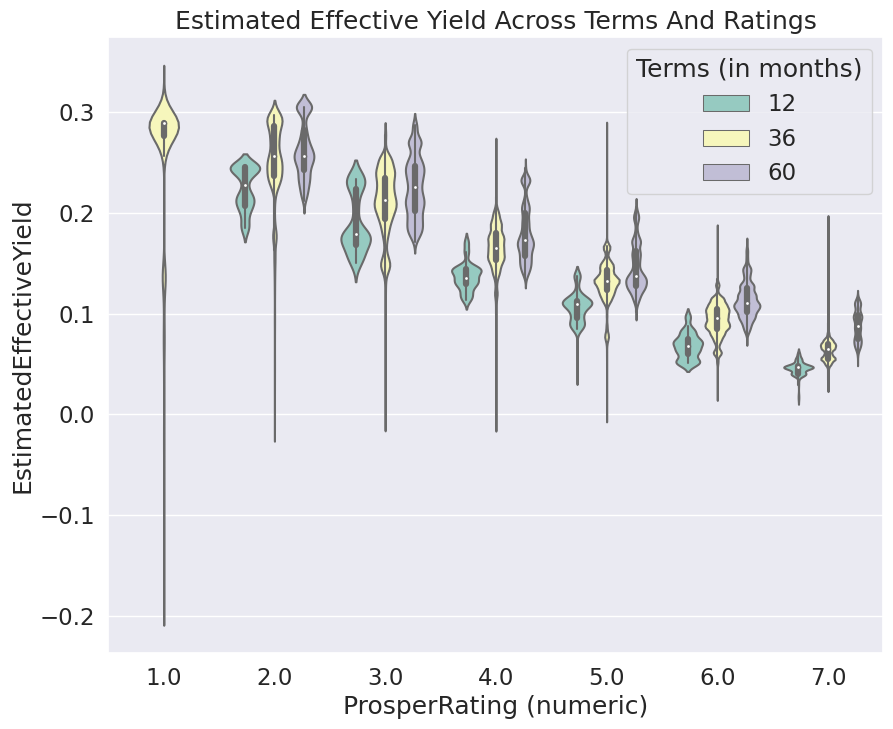

In [8]:
#violin plot

fig = plt.figure(figsize = [10, 8])
ax = sns.violinplot(x='ProsperRating (numeric)', y='EstimatedEffectiveYield', hue='Term',
                 data=loans_subset, palette="Set3")
plt.title('Estimated Effective Yield Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');

In [9]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'slide_deck.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
